<a href="https://colab.research.google.com/github/jansle2005/Data-Science-Repository/blob/master/FINAL_4_acidentes_aereos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%matplotlib inline
import pandas as pd #Para criação de DataFrames
import matplotlib.pyplot as plt #Para plotagem
import random

In [8]:
ocorrencia = pd.read_csv('ocorrencia.csv')
aeronave = pd.read_csv('aeronave.csv')

In [9]:
ocorrencia.head(3)

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.0,2014-04-07,0,1,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.0,2016-07-07,0,1,1.0,2016-07-30


In [10]:
base=ocorrencia.drop(['dia_extracao','codigo_ocorrencia','sera_investigada','comando_investigador','status_investigacao','numero_relatorio','relatorio_publicado','dia_publicacao','quantidade_recomendacoes'], axis=1)

In [11]:
#Colunas do arquivo 'ocorrencia.csv'
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   classificacao         2027 non-null   object 
 1   tipo                  2027 non-null   object 
 2   localidade            2027 non-null   object 
 3   uf                    2027 non-null   object 
 4   pais                  2027 non-null   object 
 5   aerodromo             2024 non-null   object 
 6   dia_ocorrencia        2027 non-null   object 
 7   horario               2027 non-null   object 
 8   aeronaves_envolvidas  2027 non-null   int64  
 9   saida_pista           256 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 158.5+ KB


Vamos também remover as linhas em que o campo Código da Ocorrência está inválido. Este arquivo não possui nenhum registro inválido, mas para casos futuros, já vou deixar esse comando pronto.

In [12]:
# Salvar base gerada
base.to_csv('base.csv')

In [13]:
# Limpas NaN de todo o DataFrame
base.dropna()

# Fazer a ordem cromática dos indexes
base.reset_index(drop=True)

base=base.rename(columns={'# ACFTs': '#ACFT'})
base

,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,aeronaves_envolvidas,saida_pista
0,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,1,NaN
1,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,1,NaN
2,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,1,1.0
3,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,1,NaN
4,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,1,NaN
...,...,...,...,...,...,...,...,...,...,...
2022,INCIDENTE GRAVE,PERDA DE COMPONENTE EM VOO,MEDELLIN,EX,COLÔMBIA,****,2009-03-26,04:46:00,1,NaN
2023,INCIDENTE GRAVE,OUTROS TIPOS,LIMA,EX,PERU,****,2006-10-31,00:00:00,1,NaN
2024,ACIDENTE,COLISÃO COM OBSTÁCULO NO SOLO,MENDONZA,EX,ARGENTINA,****,2006-01-03,00:00:00,1,NaN
2025,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,ÁGUAS INTERNACIONAIS,***,BRASIL,****,2013-09-01,00:00:00,1,NaN


Vamos ver como ficou nosso novo DataFrame.

In [14]:
base.count()

classificacao           2027
tipo                    2027
localidade              2027
uf                      2027
pais                    2027
aerodromo               2024
dia_ocorrencia          2027
horario                 2027
aeronaves_envolvidas    2027
saida_pista              256
dtype: int64

In [15]:
# Vamos transformar a coluna horario que está em hh:mm:ss em valores de hora decimal
base.horario=pd.to_timedelta(base.horario).astype(int) / 1e9/3600

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [16]:
base

,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,aeronaves_envolvidas,saida_pista
0,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11.000000,1,NaN
1,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12.533333,1,NaN
2,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15.166667,1,1.0
3,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17.000000,1,NaN
4,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17.500000,1,NaN
...,...,...,...,...,...,...,...,...,...,...
2022,INCIDENTE GRAVE,PERDA DE COMPONENTE EM VOO,MEDELLIN,EX,COLÔMBIA,****,2009-03-26,4.766667,1,NaN
2023,INCIDENTE GRAVE,OUTROS TIPOS,LIMA,EX,PERU,****,2006-10-31,0.000000,1,NaN
2024,ACIDENTE,COLISÃO COM OBSTÁCULO NO SOLO,MENDONZA,EX,ARGENTINA,****,2006-01-03,0.000000,1,NaN
2025,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,ÁGUAS INTERNACIONAIS,***,BRASIL,****,2013-09-01,0.000000,1,NaN


In [17]:
# Vamos limpar os NaN
base.dropna()

# importante resetar o index
base=base.reset_index(drop=True)

In [18]:
colunas=list(base)


Coluna: classificacao
_______________________________
|  Valores              FA    |
|-----------------------------|
ACIDENTE           1475
INCIDENTE GRAVE     552
Name: classificacao, dtype: int64


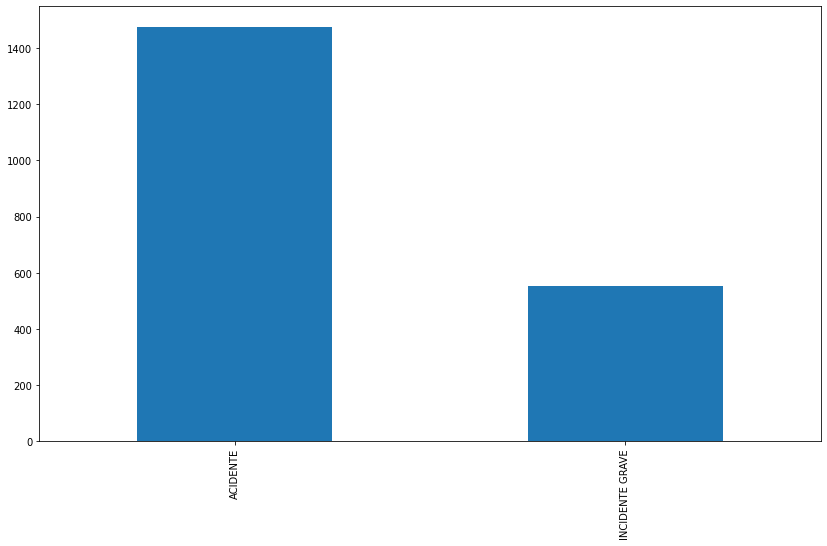

                                   
Coluna: tipo
_______________________________
|  Valores              FA    |
|-----------------------------|
FALHA DO MOTOR EM VOO                             377
PERDA DE CONTROLE NO SOLO                         325
PERDA DE CONTROLE EM VOO                          310
COLISÃO EM VOO COM OBSTÁCULO                      142
COM TREM DE POUSO                                 130
OUTROS TIPOS                                       87
PANE SECA                                          74
FALHA DE SISTEMA / COMPONENTE                      61
INDETERMINADA                                      57
POUSO SEM TREM                                     54
POUSO EM LOCAL NÃO PREVISTO                        44
POUSO BRUSCO                                       40
COLISÃO COM OBSTÁCULO NO SOLO                      40
POUSO LONGO                                        30
CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO          27
PERDA DE COMPONENTE EM VOO                   

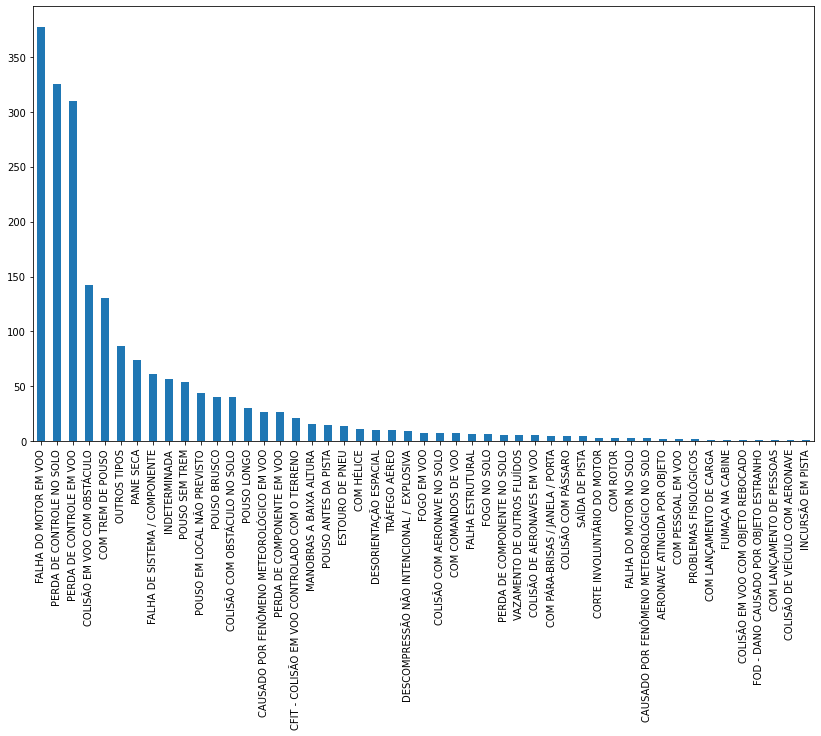

                                   
Coluna: localidade
_______________________________
|  Valores              FA    |
|-----------------------------|
RIO DE JANEIRO    64
SÃO PAULO         47
GOIÂNIA           41
BRASÍLIA          30
MANAUS            29
                  ..
IMBITUBA           1
BOCAIÚVA           1
EDÉIA              1
BOM DESPACHO       1
CAMBERLEY          1
Name: localidade, Length: 815, dtype: int64


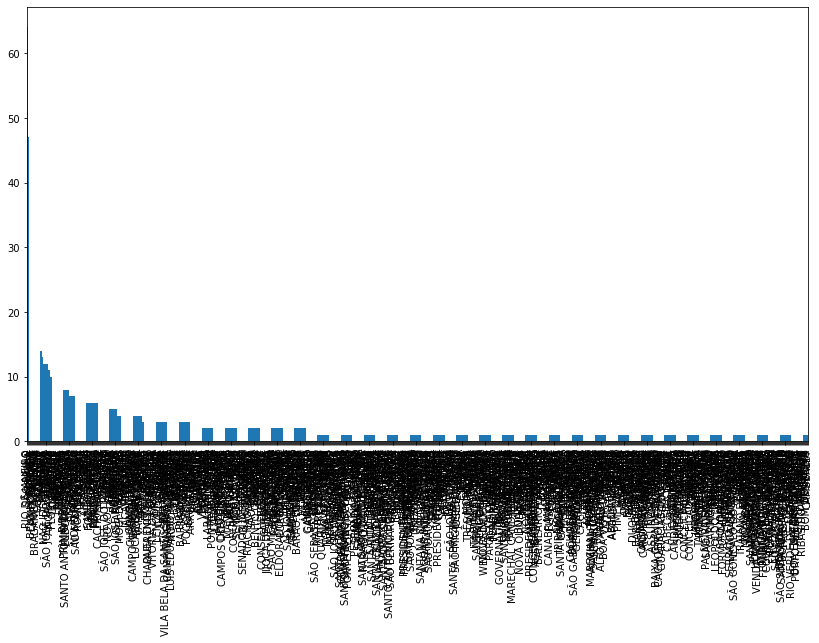

                                   
Coluna: uf
_______________________________
|  Valores              FA    |
|-----------------------------|
SP     434
RS     169
PR     154
MT     153
MG     152
GO     141
RJ     120
PA     119
BA      83
AM      81
MS      72
SC      58
MA      40
DF      30
TO      30
PE      29
RR      25
CE      25
PI      20
ES      16
RO      14
AC      14
AL      12
EX       8
SE       7
RN       7
AP       6
PB       6
***      2
Name: uf, dtype: int64


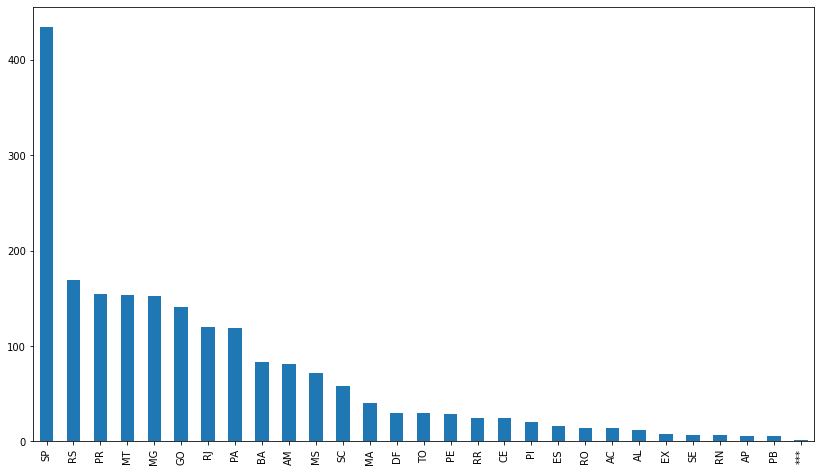

                                   
Coluna: pais
_______________________________
|  Valores              FA    |
|-----------------------------|
BRASIL        2019
PARAGUAI         2
URUGUAI          2
COLÔMBIA         1
PERU             1
ARGENTINA        1
INGLATERRA       1
Name: pais, dtype: int64


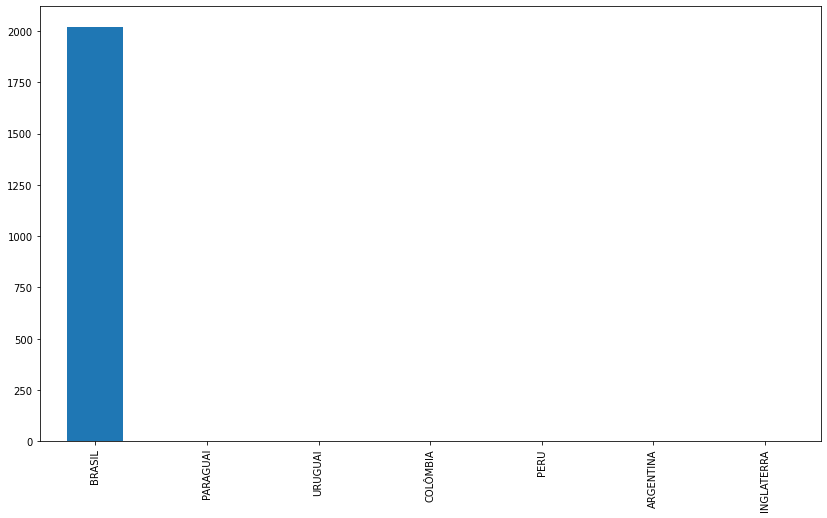

                                   
Coluna: aerodromo
_______________________________
|  Valores              FA    |
|-----------------------------|
****    1217
SBMT      18
SBBP      17
SBJR      15
SWNV      15
        ... 
SNEB       1
SSDP       1
SSCT       1
SDWS       1
EGLK       1
Name: aerodromo, Length: 306, dtype: int64


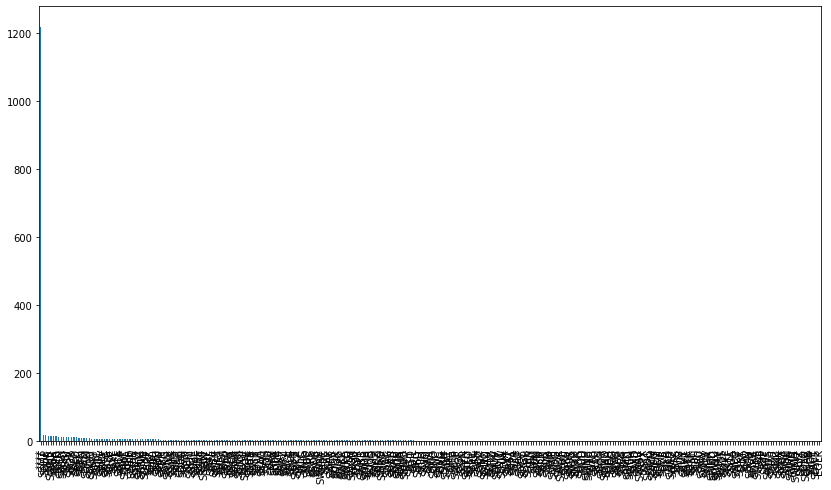

                                   
Coluna: dia_ocorrencia
_______________________________
|  Valores              FA    |
|-----------------------------|
2012-09-24    6
2013-02-16    5
2010-09-15    4
2015-04-05    4
2013-04-22    4
             ..
2013-01-05    1
2010-01-04    1
2009-08-05    1
2007-07-14    1
2015-07-31    1
Name: dia_ocorrencia, Length: 1510, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

for campo in colunas:
  print('Coluna:',campo)
  print('_______________________________')
  print('|  Valores              FA    |' )
  print('|-----------------------------|')
  print(base[campo].value_counts()) 
  g= base[campo].value_counts().plot(kind='bar',figsize=(14,8))
  plt.show(g)
  print('                                   ')



In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('name-of-the-notebook.ipynb')

  



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
base['horario'].plot(kind='hist')

In [ ]:
base['horario'].plot(kind='density')

In [ ]:
base.plot(x="horario", y=["sum "Median", "P75th"])
>>> plt.show()

<h1>Visualização dos Dados (Data Visualization)</h1>

Certo, nosso DataFrame está mais limpo e apresentável. Agora, vamos realizar alguns <i>Insights</i> em torno dos dados contidos aqui.

As primeiras perguntas que eu gostaria de responder são:<br><br>
<b>Como é classificada uma ocorrência? Como se divide o total geral nestas categorias?</b>


Para responder a isso, criei a variável ```tipo_ocorrencia```, que armazenará as informações deste dataset agrupadas por classificação. A coluna ```CONTAGEM``` será somada, retornando um gráfico com o total de ocorrências para cada classificação.
<br>
Ficou confuso? Vamos ver como funciona na prática!

In [ ]:
#Cores para serem usadas nos gráficos
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

In [ ]:
classificacao = ocorrencia.groupby('CLASSIFICAÇÃO')['CONTAGEM'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in classificacao.patches:
    b=p.get_bbox()
    classificacao.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
plt.ylabel('QUANTIDADE')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR CLASSIFICAÇÃO \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.show()

Como podemos ver no gráfico, as ocorrências são divididas em duas principais classificações: Acidente e Incidente Grave. Vale lembrar que, embora este arquivo trate de ocorrências envolvendo aeronaves nos últimos 10 anos, não significa que todas as ocorrências foram graves ou que houveram fatalidades. Muitos dos casos são sim, de quedas de avião decorrente de alguma falha humana ou mecânica, mas você verá mais a frente que nem todos são assim.

Após classificarmos nossas ocorrências, quero responder a mais uma pergunta: 

<b>Quais os tipos de ocorrências que existem e qual foi sua frequência nestes últimos anos?</b>

In [ ]:
ax = ocorrencia.groupby('TIPO DE OCORRÊNCIA')['CONTAGEM'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(10,10))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()

O processo de geração deste gráfico foi semelhante ao anterior: agrupei todos os dados da coluna 'TIPO' e somei os valores da coluna 'CONTAGEM'. Então, realizei a plotagem desses dados para melhor visualização.

De acordo com os dados desse <i>plot</i>, as maiores causas de ocorrências são devidas a falhas de motor durante o vôo, seguida por perda de controle em solo e perda de controle em vôo. Embora tais causas nos remetam a falha humana na operação, não podemos levar isto como uma regra. Uma perda de controle em vôo pode dever-se desde incompetência técnica até falha em dispositivos como o radar. Todavia, a escala destes três principais motivos é uma causa a se preocupar.

Seguindo nosso estudo, vamos responder a próxima pergunta:<br><br>
<b>Como tem sido a progressão desses últimos anos? Tiveram menos ocorrências ou mais?</b>

In [ ]:
plotagem_data = ocorrencia.copy()
plotagem_data['DIA DA OCORRÊNCIA'] = plotagem_data['DIA DA OCORRÊNCIA'].apply(lambda x: x.replace(x,x[0:4]))
plotagem_data.groupby('DIA DA OCORRÊNCIA')['CONTAGEM'].sum().plot(color='purple', figsize=(12,5), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA AO LONGO DOS ANOS \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('ANO REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

A progressão de ocorrências aéres nos últimos 10 anos tem crescido assustadoramente. Enquanto em 2006 tivemos menos que 130 ocorrências, em 2012 esse número subiu para quase 300! Vale lembrar que, embora em 2007 tenham ocorridos menos casos envolvendo aviões, este foi o ano do maior desastre aéreo já ocorrido no Brasil: o acidente do avião da TAM, que matou 194 pessoas. Mas, vamos deixar essa parte mais a frente deste estudo. A boa notícia é que, de 2012 até agora o número de ocorrências tem diminuído.

E quanto aos estados? <b>Quais foram os que mais registraram ocorrências?</b>

In [ ]:
ax_estado =  ocorrencia.groupby('UF')['CONTAGEM'].sum().plot(kind='bar', color=random.choice(colors), figsize=(11,5))

plt.xlabel('ESTADO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR ESTADO\nTotal: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.xticks(rotation=0)
plt.show()

O Estado de São Paulo foi o que mais teve ocorrências de 2006 a 2015. O número preocupante é maior do que os encontrados em todos os estados da região sudeste juntos! É de conhecimento que São Paulo é o estado com mais aeroportos do Brasil o que nos permitiria cogitar que este é o motivo de tantas ocorrências, não obstante, outros estados com muitos aeroportos como: Goiás, Maranhão, Mato Grosso e Minas Gerais obtiveram um <i>score</i> consideravelmente menor que o estado de São Paulo.

Você deve ter percebido duas informações diferentes nesse gráfico: os "estados" \*\*\*\ e EX. Este último, por exemplo, representa ocorrências registradas fora do território brasileiro, mas com aeronaves nacionais.

Já os três asterísticos representam locais que não tiveram sua localização identificadas (vide tabela abaixo), como a ocorrência 49474, que ocorreu em águas internacionais.

In [ ]:
#Duas ocorrências em que não tiveram locais determinados
ocorrencia[ocorrencia['UF'] == '***']

<h1>Analisando o dataset de aeronaves</h1>

Agora iremos partir para o segundo conjunto de dados deste estudo: o dataset de aeronaves. Este arquivo possui informações acerca dos veículos que estavam envolvidos nas ocorrências registradas dos últimos anos. Primeiro, realizarei a fase de limpeza dos dados (semelhante ao feito anteriormente), depois, irei trazer alguns <i>Insights</i> a partir da visualização dos dados. Vamos começar?

<h2>Limpeza dos Dados (Data Cleaning)</h2>

O arquivo "aeronave.csv" possui 24 colunas com informações sobre os aviões. Muitos desses dados não são de grande valia para esse estudo, como matricula da aeronave, seu código, peso máximo na decolagem e categoria de registro. Inicialmente, irei removê-los do DataFrame para melhor visualização, depois, converterei colunas indevidas com seu respectivo tipo de arquivo, seguido por processos como renomeação de colunas e eliminação de dados nulos.

Abaixo, apresento as primeiras linhas do arquivo.

In [ ]:
aeronave.head()

A seguir eu retiro as colunas que não me interessam para este projeto. Perceba no bloco abaixo como fica a tabela sem esses dados.

In [ ]:
aeronave.drop(['codigo_aeronave','matricula','codigo_operador','peso_maximo_decolagem',
               'categoria_registro', 'origem_voo', 'destino_voo', 'dia_extracao'], axis = 1, inplace = True)

aeronave.head()

Feita a exclusão, é hora de visualizar como o Python está tratando cada coluna.

In [ ]:
aeronave.dtypes

Um primeiro ponto que me incomodou foi o fato dele estar tratando as colunas de quantidades de assentos, ano de fabricação, quantidade de motores e quantidade de fatalidades como valores flutuantes (float64), ou seja, com pontos decimais. Ora, não existe, por exemplo, aeronaves com dois motores e meio (2,5), tampouco morrem durante um acidente três pessoas e meia (3,5). Mais a frente, durante a fase de visualização dos dados, isso será um problema, portanto, vamos tratá-lo.

Primeiro eu crio duas funções: ```convert_na``` e ```convert_dtype```. A primeira, irá procurar por valores nulos nas linhas das colunas especificadas no momento do chamado da função, e irá preenche-las com o numeral 0. Já a segunda função irá converter esse DataFrame atualizado para um tipo específico de formato (em nosso caso, numeros inteiros). Confira abaixo maiores detalhes de cada função.

In [ ]:
'''
A função convert_na possui dois argumentos: um DataFrame e sua coluna. 
Tal Series terá todos os seus valores nulos (NaN) atualizados para o numeral 0.
'''

def convert_na(dataframe, column):
    for i in column:
        dataframe[i].fillna(0, inplace = True)

convert_na(aeronave,['quantidade_fatalidades','quantidade_motores','ano_fabricacao','quantidade_assentos'])

In [ ]:
'''
A função convert_dtype possui três argumentos: um DataFrame, uma coluna (Series) e o dtype que o usuário deseja alterar.
Para cada Series declarada na função, ela irá converter tal coluna para o dtype desejado
'''

def convert_dtype(dataframe, column, dtype):
    for i in column:
        dataframe[i] = dataframe[i].astype(dtype)

convert_dtype(aeronave,['quantidade_motores','quantidade_assentos','ano_fabricacao','quantidade_fatalidades'],int)

Declaradas as funções e realizada as devidas alterações nas colunas, vamos ver como o Python interpretará tais dados agora.

In [ ]:
#Dtypes de float alterados para int
aeronave.dtypes

Como desejei, as colunas foram alteradas com sucesso de decimais para números inteiros.

O próximo passo é renomear todas as colunas restantes nesse DataFrame para podermos ter uma visualização melhor. Aproveito para converter todos os valores nulos para a sentença "NÃO IDENTIFICADO". Isso facilitará o entendimento. O último <i>statement</i> do código irá incluir uma nova coluna no DataFrame: CONTAGEM, a qual irei atribuir o valor único de 1 para poder realizar alguns cálculos com mais facilidade.

In [ ]:
aeronave.columns = ['CÓDIGO DA OCORRÊNCIA','EQUIPAMENTO','FABRICANTE','MODELO','TIPO DE MOTOR','QUANTIDADE DE MOTORES',
                    'QUANTIDADE DE ASSENTOS','ANO DE FABRICAÇÃO','PAÍS DE REGISTRO','CATEGORIA DE AVIÃO','FASE DE OPERAÇÃO',
                    'TIPO DE OPERAÇÃO','NÍVEL DE DANO','QUANTIDADE DE FATALIDADES']
aeronave = aeronave.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
aeronave['CONTAGEM'] = 1

Vamos visualizar como ficou o novo DataFrame.

In [ ]:
#DataFrame alterado
aeronave.head()

Um fato me chamou a atenção neste arquivo de aeronaves: seu tamanho é maior que o arquivo de ocorrências. Levando em consideração que para cada aeronave há uma ocorrência, o que explicaria esse detalhe?

Para termos certeza de que os DataFrames ```ocorrencia.csv``` e ```aeronave.csv``` são diferentes, vamos conferir no código.

In [ ]:
#Verificando se os dataframes são iguais
aeronave['CÓDIGO DA OCORRÊNCIA'].equals(ocorrencia['CÓDIGO DA OCORRÊNCIA'])

Sim, de fato são diferentes. A explicação para este fato é de que uma ocorrência que envolveu mais de uma aeronave terá o mesmo número de ocorrência para ambos. Vimos no gráfico acima que há casos onde aeronaves se chocaram em vôo. Para ambas foi aberta o mesmo número de ocorrências.

Vamos através do código abaixo, descobrir quantas ocorrências nós temos sob o mesmo código.

In [ ]:
#Pegando linhas duplicadas no DataFrame
ocorrencias_duplicadas = aeronave[aeronave['CÓDIGO DA OCORRÊNCIA'].duplicated()].reset_index(drop=True)
ocorrencias_duplicadas.drop('CONTAGEM', axis = 1, inplace = True)
print('Há ' + str(ocorrencias_duplicadas.shape[0]) + ' ocorrências duplicadas.')

Vamos visualizar algumas das ocorrências de mesmo número

In [ ]:
ocorrencias_duplicadas.head(6)

<h1>Visualização dos Dados (Data Visualization)</h1>

Agora que tratamos e limpamos nosso <i>dataset</i>, é hora de visualizarmos os dados. Em nosso conjunto, existe a informação sobre o tipo de motor que a aeronave utiliza, sendo assim, a primeira pergunta que desejo responder é: <br><br><b>Qual tipo de motor mais gerou ocorrências nos últimos 10 anos?</b>

In [ ]:
ax = aeronave.groupby('TIPO DE MOTOR')['CONTAGEM'].sum().sort_values().plot(kind='bar', color=random.choice(colors), figsize=(11,5))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS\nPOR TIPO DE MOTOR DE AERONAVE\nTotal: '+str(aeronave['CONTAGEM'].sum())+' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

Os motores a pistão reinam com as maiores quantidades de ocorrências geradas. Esse motor é um dos mais antigos (e até usados) motores de aeronave no mundo, muito comum em aviões monomotores. Além do baixo custo, eles são semelhantes aos motores de carro, mas tratados com os padrões de qualidade e confiança da aeronáutica, funcionando muito bem em baixar altitudes.

O segundo e terceiro lugar ficaram para os motores de Turboeixo e Turboélice. Assim como o motor de pistão, o Turboélice é caracterizado pela hélice que fica a frente do avião, utilizando a famosa Lei da Ação e Reação para movimentar a aeronave, contudo, sua diferença está em utilizar pequenos jatos para realizar tal funcionamento.

Próxima pergunta:
<br>
<b>Será que ocorrências envolvendo aviões aparecem em menor frequência do que para helicópter e outras aeronaves?</b>
<br>

In [ ]:
ax = aeronave.groupby('EQUIPAMENTO')['CONTAGEM'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(11,5), color=random.choice(colors))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS POR TIPO DE AERONAVE\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=45)
plt.show()

Definitivamente, ocorrências envolvendo aviões surgem com muito mais frequência do que para helicópteros. Na verdade, a quantidade total de ocorrências de aviões é maior do que a soma de todos os outros tipos de aeronave. Até mesmo dirigíveis aparecem neste <i>dataset</i>!

Se temos tantas quantidades de ocorrências registradas nesses anos, <b>quais são as fabricantes que mais aparecem nos problemas relatados?</b>

In [ ]:
ocorrencias_fabricante = aeronave.groupby('FABRICANTE')['CONTAGEM'].sum().sort_values(ascending = False)
ocorrencias_fabricante.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIAS POR FABRICANTE\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

A fabricante brasileira Neiva Industria ocupa 19,6% das causas de ocorrências envolvendo aeronaves, seguida pela Cessna Aircraft e Piper Aircraft. A Neiva Industria Aeronáutica tem estado há 50 anos no mercado produzindo, principalmente, aviões de motores a pistão voltados para agricultura. Já a Cessna Aircraft é uma empresa americana, sediada no Kansas, que possui um inventário mais abrangente de aeronaves, produzindo desde monomotores a aviões a jato.

A quantidade de ocorrências para essas duas fabricantes mostra a diferença gritante em relação as outras. A Neiva Industria, por exemplo, possui uma diferença próxima de 150% em relação ao terceiro lugar: a Piper Aircraft. Tais indicadores seriam uma boa forma de reavaliar o processo de montagem, manutenção e qualidade de peças dessas fabricantes.

Um outro questionamento que podemos fazer é:<br><br>
<b>Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?</b>

In [ ]:
categoria_aviao = aeronave.groupby('CATEGORIA DE AVIÃO')['CONTAGEM'].sum().sort_values().plot(kind='barh', figsize=(11,7), color=random.choice(colors), alpha=.8, grid = True)

plt.title('QUANTIDADE DE OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS\nAGRUPADAS POR CATEGORIA DE AVIÃO')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()


Muitas pessoas tem medo de voar. Isso é fato, contudo, esses dados mostrados no gráfico acima mostram que esse medo pode ser diminuído. A esmagadora maioria de ocorrências registradas são atribuídas a aeronaves particulares, que podem ser desde monomotores e ultraleves até aviões particulares. O transporte Regular - aquele que companhias aéreas oferecem para o público em geral -, possui menos de 100 ocorrências nos últimos anos. Tais dados explicam o porquê da Neiva Industria ser uma das fabricantes que mais possuem ocorrência, já que a grande fatia desta escala é atribuida aos principais tipos de avião que ela produz.

Vamos agora olhar para o momento em que as ocorrências surgiram. Com isso, quero saber se é mais propício ocorrer um problema durante o pouso, decolagem ou outro momento da viagem.

In [ ]:
fase_de_operacao = aeronave.groupby('FASE DE OPERAÇÃO')['CONTAGEM'].sum().sort_values().plot(kind='barh', figsize=(11,7), color=random.choice(colors), grid = True)
plt.title('QUANTIDADE DE OCORRÊNCIAS POR FASE DE OPERAÇÃO\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

De fato, o momento do pouso é um dos mais importantes da viagem. Cerca de 400 ocorrências, das mais de 2000 registradas ocorreram nesta fase. Contudo, vale ressaltar que a decolagem está consideravelmente próxima ao pouso, fazendo dela uma operação delicada também. Já a fase de cruzeiro, que se encontra em terceira posição, é o momento da viagem em si, quando o avião está trafegando da origem ao destino.

Como já disse anteriormente, nem toda ocorrência gerada resulta em fatalidades e danos na aeronave. Uma ocorrência, como o nome já diz, se refere ao fato de que algum evento não previsto ocorreu.

Não obstante, esta é uma pergunta interessante a se responder. Afinal, <b>quais são os tipos de danos que podem ocorrer a uma aeronave? Qual a frequência?</b>

In [ ]:
tipo_de_dano = aeronave.groupby('NÍVEL DE DANO')['CONTAGEM'].sum().sort_values().plot(kind='bar', figsize=(11,5), color=random.choice(colors), grid = True)

plt.title('OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS AGRUPADAS\nPOR TIPO DE DANO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

Danos substanciais são aqueles que danificaram significantemente a aeronave. Há casos em que a fuselagem foi danificada, uma asa, turbina, hélice, dentre outros. Este tipo é o que mais surgiu durante esses anos, seguido por danos em que a aeronave ficou totalmente destruída.

Por fim, quero saber em quantas ocorrências houveram fatalidades. Para ter essa informação, agruparei os casos onde pessoas morreram por quantidade, a fim de saber não só quantas fatalidades houveram nesta última década, mas também a sua frequência.

In [ ]:
fatalidades_maior_que_zero = aeronave[aeronave['QUANTIDADE DE FATALIDADES'] > 0]
fatalidades = fatalidades_maior_que_zero.groupby('QUANTIDADE DE FATALIDADES')['CONTAGEM'].sum().plot(kind='bar', figsize=(11,5), color=random.choice(colors))

for p in fatalidades.patches:
    b=p.get_bbox()
    fatalidades.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 2))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS AGRUPADAS\nPOR QUANTIDADE DE FATALIDADES')
plt.ylabel('QUANTIDADE DE OCORRÊNCIA')
plt.xticks(rotation=0)
plt.show()

Para esse gráfico, ignorei casos onde não houveram fatalidades, que felizmente, é a grande maioria. Os dados restantes geraram o gráfico acima, que mostra que a maior frequência de mortes é atribuída a apenas uma pessoa. Novamente, lembre-se que a maioria das ocorrências registradas são de aviões a pistão, aeronaves estas presentes na linha de produção da fabricante com mais ocorrências: a Neiva Industria. Aeronaves monomotores e ultraleves possuem uma quantidade de assentos bem limitada - cerca de um ou dois. Tais quantidades são justamente encontradas nas duas primeiras posições do gráfico.

Mas, dois casos me chamaram a atenção. Ao final do gráfico, é possível visualizar que há um caso onde morreram 154 pessoas e outro onde 199 fatalidades ocorreram. Sinceramente, não me lembrava de nenhum caso nos últimos anos envolvendo uma quantidade tão grande de mortes, sendo assim, decidi investigar.

Abaixo, você pode conferir as duas linhas onde essas ocorrências se encontram na tabela.

In [ ]:
piores_acidentes = aeronave[aeronave['QUANTIDADE DE FATALIDADES'] > 100]
piores_acidentes

Após uma pesquisa, lembrei-me de qual caso foi este. Trata-se do desastre envolvendo um Airbus A-320 no ano de 2007 em São Paulo, quando este tentou, sem sucesso, pousar na pista principal do aeroporto de Congonhas. Sob chuva, a aeronave ultrapassou os limites do aeroporto, atravessou a avenida Washington Luiz - chegando a tocar em um táxi durante o trajeto - e acabou se chocando contra um prédio da TAM Express. Você pode conferir maiores informações sobre esse trágico acidente que matou 199 pessoas <a href='http://noticias.uol.com.br/ultnot/especial/acidentecongonhas/ultnot/2007/07/27/ult5258u401.jhtm'>clicando aqui</a>

In [ ]:
#Linha da ocorrência gerada devido ao acidente do Airbus A-320
ocorrencia[ocorrencia['CÓDIGO DA OCORRÊNCIA'] == 29859]

O segundo pior caso completou 10 anos em 29/09/2016, quando um boeing da Gol chocou-se contra jato Legacy que se dirigia para os Estados Unidos. Com a queda, a aeronave caiu em uma mata fechada no Mato Grosso do Sul, matando 154 pessoas a bordo, incluindo passageiros e tripulação. <a href='http://g1.globo.com/mato-grosso/noticia/2016/09/acidente-com-aviao-da-gol-que-matou-154-pessoas-completa-10-anos.html'>Confira maiores detalhes clicando aqui</a>.

In [ ]:
ocorrencia[ocorrencia['CÓDIGO DA OCORRÊNCIA'] == 30375]

<h1>Conclusão</h1>

Aviões e aeronaves não estão insentas de sofrerem acidentes e problemas. A história tem registros de casos onde centenas de pessoas morreram e milhares de ocorrências foram geradas. Não obstante, vale lembrar que, embora o impacto gerado por uma queda de avião seja grande, sua probabilidade de ocorrer ainda é pequena. 

Mas, vamos levar em consideração outros meios de transporte, como o carro e moto. Apenas no Brasil em 2013, <a href='www.un.org/apps/news/story.asp?NewsID=52300#.ViZ1yNKrSM-'>41 mil pessoas morreram devido a acidentes de trânsito</a>, fazendo do Brasil o <a href='https://nacoesunidas.org/oms-brasil-e-o-pais-com-maior-numero-de-mortes-de-transito-por-habitante-da-america-do-sul/'>país com maior número de mortes no trânsito da América do Sul</a>. Já no mundo, tais acidentes são responsáveis por mais de 1,25 milhão de fatalidades, tendo uma frequência maior em países como China, EUA e Índia. 

Sim, de fato aviões não são indestrutíveis ou absolutamente seguros, mas, mesmo em meio ao cenário atual, é uma das formas mais seguras de viajar.

Curtiu esse estudo? <a href='www.paulovasconcellos.com.br'>Aproveite para passar no meu blog</a> e ver estes e outras notícias e projetos de Data Science. <a href='https://twitter.com/paulo_zip'>Aproveite e me siga no Twitter</a> para que possamos trocar idéias. Será um prazer ter você lá. Até mais!

<h2>Referências</h2>
<br>
https://nacoesunidas.org/oms-brasil-e-o-pais-com-maior-numero-de-mortes-de-transito-por-habitante-da-america-do-sul/<br>
http://www.un.org/apps/news/story.asp?NewsID=52300#.ViZ1yNKrSM-<br>
http://g1.globo.com/mato-grosso/noticia/2016/09/acidente-com-aviao-da-gol-que-matou-154-pessoas-completa-10-anos.html<br>
http://noticias.uol.com.br/ultnot/especial/acidentecongonhas/ultnot/2007/07/27/ult5258u401.jhtm<br>
http://globoesporte.globo.com/sc/futebol/times/chapecoense/acidente/